# Regression practice

In [36]:
import pandas as pd

import scipy as sp
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

plt.style.use('seaborn')

data = pd.read_excel('data/Folds5x2_pp.xlsx', encoding='latin-1')
data.columns = ['temp', 'exhaust_vol', 'pressure', 'rel_humid', 'power']
X = data[['temp', 'exhaust_vol', 'pressure', 'rel_humid']]
y = data['power']

## Checking assumptions

### Relationship b/t X and y is linear

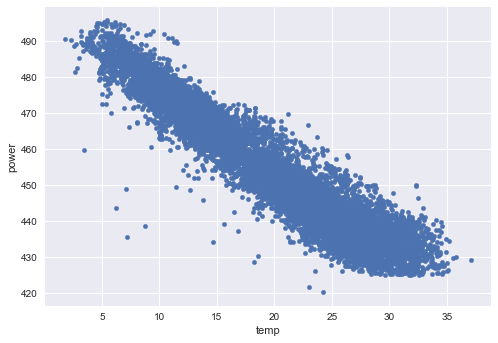

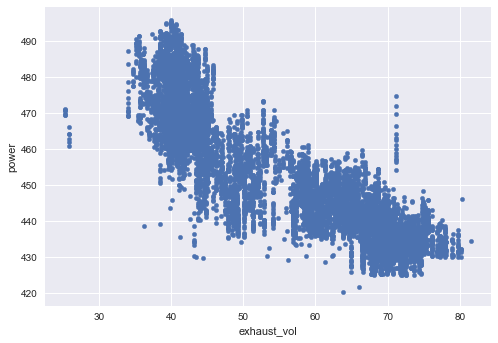

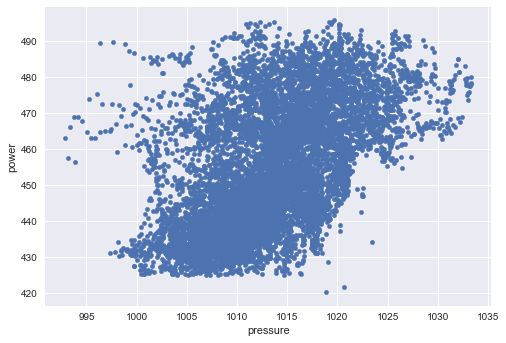

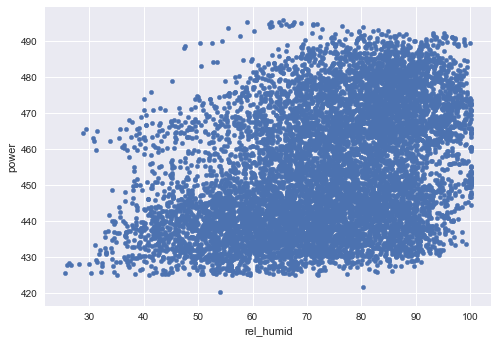

In [25]:
for var in X.columns:
    data.plot.scatter(x=var, y='power')

#### Which variables appear to be linear in the power output variable?

### Interpretation of regression

In [26]:
exhaust_model = ols(formula='power~exhaust_vol', data=data).fit()  
exhaust_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  power   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:35:29   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     517.8015      0.378   1370.218      0.000     517.061     518.542
exhaust_vol    -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Things to look at:

- What is the R-squared / Adj R-squared?  What do these values mean?  How are they different?  What does that mean?

- What is the `coef` value on `bmi`?  What does this mean?  

- What is the `std err`?  How large is it compared to the `coef` value?  What does this mean?

- What is the `p-value`?  What does this mean?

- What is the `confidence interval`?  What does this mean?

## Checking assumptions

### Relationship between X and y is linear

Is relationship between X and y linear?


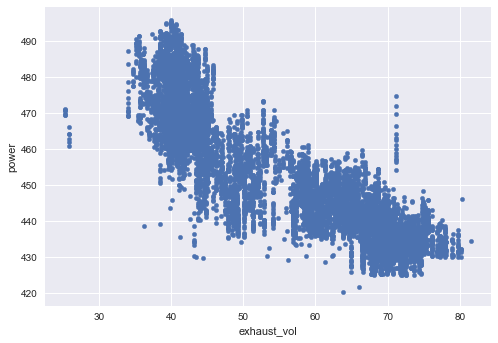

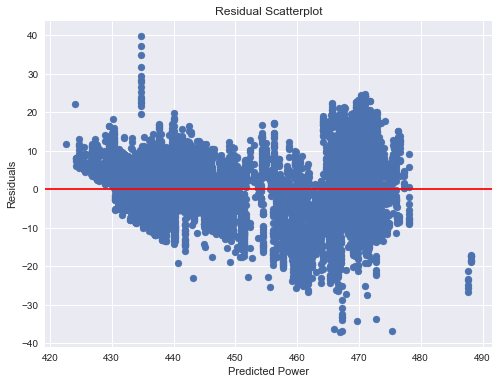

In [52]:
print('Is relationship between X and y linear?')
data.plot.scatter(x='exhaust_vol', y='power')
pred_val = exhaust_model.fittedvalues.copy()
true_val = data['power'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pred_val,residual)
ax.set_title('Residual Scatterplot')
ax.set_xlabel(f'Predicted Power')
ax.set_ylabel('Residuals')
ax.axhline(y=0, color ='r')
plt.show();

### Independence of errors & Homoskedasticity

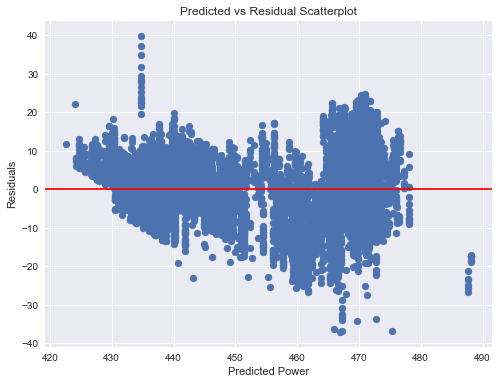

In [47]:
pred_val = exhaust_model.fittedvalues.copy()
true_val = data['power'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pred_val,residual)
ax.set_title('Predicted vs Residual Scatterplot')
ax.set_xlabel('Predicted Power')
ax.set_ylabel('Residuals')
ax.axhline(y=0, color ='r')
plt.show()



### Normality of errors

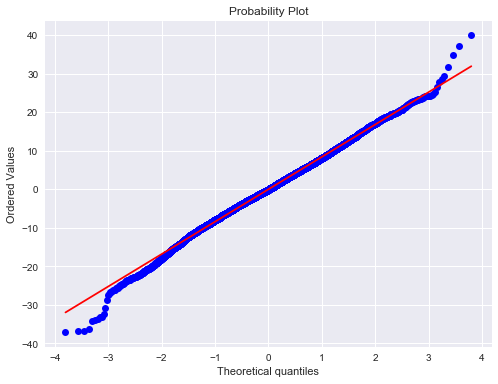

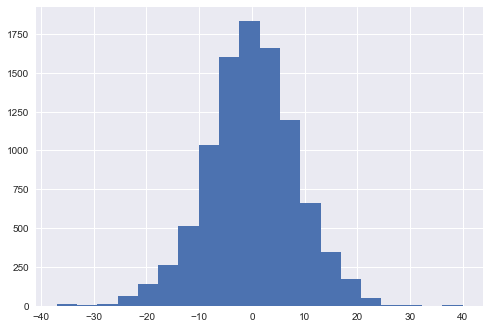

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show();
plt.hist(residual, bins=20);

### Make comparisons for other variables

Let's now look at the output for `temp`

We could copy/paste, or we could make a function that returns the model object

In [29]:
def lin_reg_model(x_val, y_val, linreg_data):
    new_model = ols(formula=f'{y_val}~{x_val}', data=linreg_data).fit()  
    
    return new_model

bmi_sq_model = lin_reg_model('temp', 'power', data)
bmi_sq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  power   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:37:33   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
temp          -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Walk through each of the bullet points as above:

- What is the R-squared / Adj R-squared?  What do these values mean?  How are they different?  What does that mean?

- What is the `coef` value on `bmi`?  What does this mean?  

- What is the `std err`?  How large is it compared to the `coef` value?  What does this mean?

- What is the `p-value`?  What does this mean?

- What is the `confidence interval`?  What does this mean?

Now, some comparisons.  How does this linear regression for `temp` compare to the linear regression for `exhaust volume`?

- `coef` value?
- `std error` value?
- Overall model metrics?

### Check assumptions for `temp`

We don't want to repeat ourselves, so create another function!

Is relationship between X and y linear?


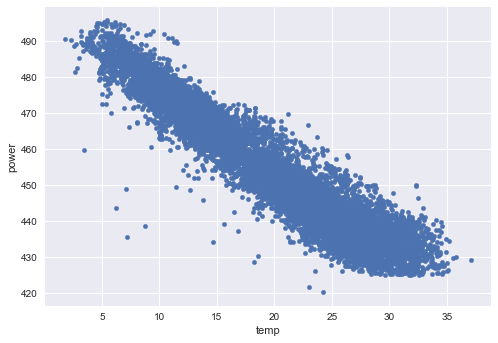

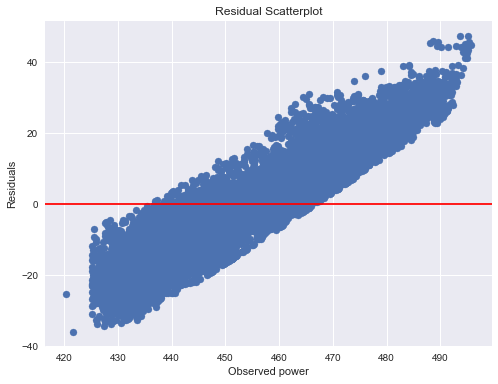

Is there a relationship b/t errors and predictions?  Is the variance consistent?


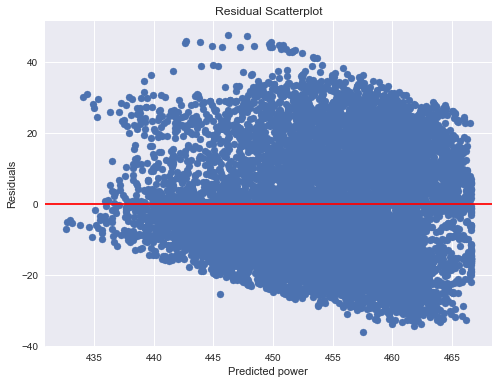

Are the errors normal?


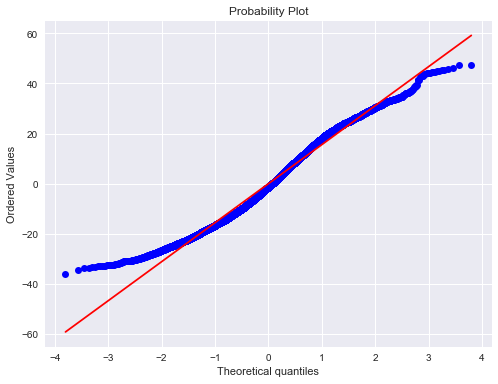

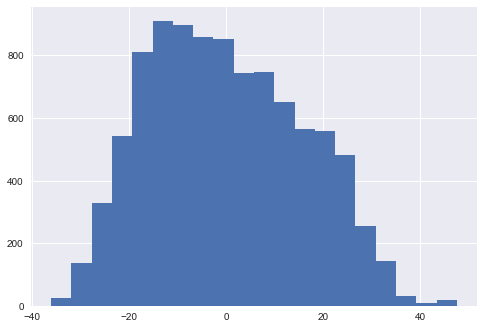

In [50]:
def check_linreg_assumptions(x_val, y_val, linreg_data, linreg_obj):
    
    print('Is relationship between X and y linear?')
    linreg_data.plot.scatter(x=x_val, y=y_val)
    pred_val = linreg_obj.fittedvalues.copy()
    true_val = linreg_data[y_val].values.copy()
    residual = true_val - pred_val

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(true_val,residual)
    ax.set_title('Residual Scatterplot')
    ax.set_xlabel(f'Observed {y_val}')
    ax.set_ylabel('Residuals')
    ax.axhline(y=0, color ='r')
    plt.show();
        
    print('Is there a relationship b/t errors and predictions?  Is the variance consistent?')
    
    pred_val = linreg_obj.fittedvalues.copy()
    true_val = linreg_data[y_val].values.copy()
    residual = true_val - pred_val

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(pred_val,residual)
    ax.set_title('Residual Scatterplot')
    ax.set_xlabel(f'Predicted {y_val}')
    ax.set_ylabel('Residuals')
    ax.axhline(y=0, color ='r')
    plt.show();
    
    print('Are the errors normal?')
    fig, ax = plt.subplots(figsize=(8,6))
    sp.stats.probplot(residual, plot=ax, fit=True)
    plt.show();
    plt.hist(residual, bins=20)
    plt.show();

temp_model_obj = lin_reg_model('temp', 'power', data)
check_linreg_assumptions('temp', 'power', data, var_model_obj)